# Importing python libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot

In [82]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Importing the work file

In [83]:
customers = pd.read_csv("C:/Users/Jarvis/Desktop/mt_data22.csv",encoding= 'unicode_escape')  # importing file

In [84]:
customers.head(5)   #exploring the variables

,Quartal,Year,Price in /m²,Material Costs,Employment costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Money Supply ,Key interest rate,DAX ,Building permits/Inhabitants,Volatility Index
0,1,2004,1448,76.9,83.2,0.0055,0.10050,7843,9.180000e+11,1.640000e+12,0.0225,4018.51,47075,22.06
1,2,2004,1433,79.9,83.3,0.0055,0.10300,7843,8.940000e+11,1.640000e+12,0.0225,3950.01,67250,23.07
2,3,2004,1422,79.9,83.2,0.0011,0.10375,7843,9.050000e+11,1.640000e+12,0.0225,3858.88,73975,19.55
3,4,2004,1405,79.9,81.3,0.0099,0.10600,7843,9.600000e+11,1.640000e+12,0.0225,4079.26,80700,16.97
4,1,2005,1395,80.5,83.6,0.0012,0.10900,8066,1.000000e+12,1.770000e+12,0.0225,4309.37,42000,13.50


In [85]:
customers=customers.drop("Quartal",axis=1) #dropping quartals

In [86]:
customers=customers.drop("Year",axis=1)   #dropping year

In [87]:
customers.corr()   #correlation matrix

,Price in /m²,Material Costs,Employment costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Money Supply ,Key interest rate,DAX ,Building permits/Inhabitants,Volatility Index
Price in /m²,1.000000,0.875576,0.942764,0.154877,-0.537589,0.525073,-0.086939,0.920573,-0.645327,0.899130,0.721368,-0.037554
Material Costs,0.875576,1.000000,0.956856,0.115058,-0.806323,0.150764,0.223126,0.961871,-0.748547,0.924159,0.637347,0.026473
Employment costs,0.942764,0.956856,1.000000,0.087620,-0.756218,0.270191,0.050669,0.974608,-0.798475,0.922070,0.696985,0.031243
Inflation Rate,0.154877,0.115058,0.087620,1.000000,0.049967,0.224429,0.037624,0.092875,0.083853,0.139824,-0.015334,-0.208213
Unemployment rate,-0.537589,-0.806323,-0.756218,0.049967,1.000000,0.334668,-0.262891,-0.741107,0.770469,-0.749628,-0.506178,0.015277
Participation at Stock Exchange,0.525073,0.150764,0.270191,0.224429,0.334668,1.000000,-0.285927,0.282845,0.172670,0.260585,0.245573,-0.003146
GDP ,-0.086939,0.223126,0.050669,0.037624,-0.262891,-0.285927,1.000000,0.152948,0.084607,0.042471,-0.256043,0.197078
Money Supply ,0.920573,0.961871,0.974608,0.092875,-0.741107,0.282845,0.152948,1.000000,-0.709335,0.923089,0.606029,0.115704
Key interest rate,-0.645327,-0.748547,-0.798475,0.083853,0.770469,0.172670,0.084607,-0.709335,1.000000,-0.695180,-0.617343,0.071489
DAX ,0.899130,0.924159,0.922070,0.139824,-0.749628,0.260585,0.042471,0.923089,-0.695180,1.000000,0.700109,-0.169176


<AxesSubplot:>

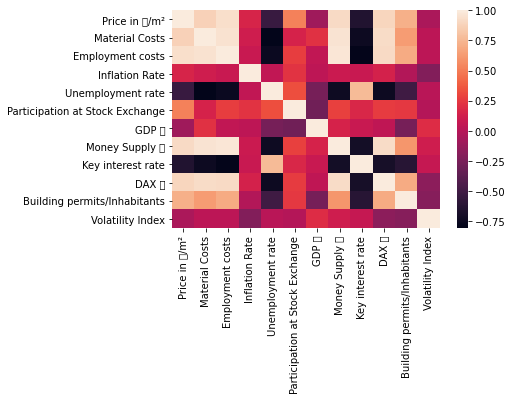

In [89]:
sns.heatmap(customers.corr())  #heatmap for correlation matrix

In [90]:
customers.describe() #descriptive statistics

,Price in /m²,Material Costs,Employment costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Money Supply ,Key interest rate,DAX ,Building permits/Inhabitants,Volatility Index
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,7.200000e+01,7.200000e+01,72.000000,72.000000,72.000000,72.000000
mean,1797.986111,96.923611,97.606944,0.004064,0.063275,7174.277778,1.148847e+12,2.589444e+12,0.011208,8642.137222,69430.555556,22.484028
std,570.545982,10.437480,12.004264,0.004870,0.023403,1007.839402,1.531289e+11,5.702134e+11,0.013240,3233.829897,22357.584190,7.576652
min,1308.000000,76.900000,81.300000,-0.007500,0.030750,5967.000000,8.800000e+11,1.640000e+12,0.000000,3858.880000,30625.000000,13.270000
25%,1361.500000,89.300000,87.125000,0.001075,0.046375,6120.000000,1.007500e+12,2.320000e+12,0.000000,6002.590000,51287.500000,17.195000
50%,1534.000000,98.100000,96.200000,0.003900,0.057000,7115.000000,1.165000e+12,2.455000e+12,0.007500,7817.675000,66475.000000,20.560000
75%,2101.000000,102.800000,106.525000,0.006725,0.077187,7947.000000,1.255000e+12,2.960000e+12,0.022500,11381.370000,86812.500000,25.437500
max,3353.000000,125.600000,122.900000,0.018900,0.112000,9339.000000,1.530000e+12,3.750000e+12,0.042500,15563.890000,114300.000000,57.330000


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


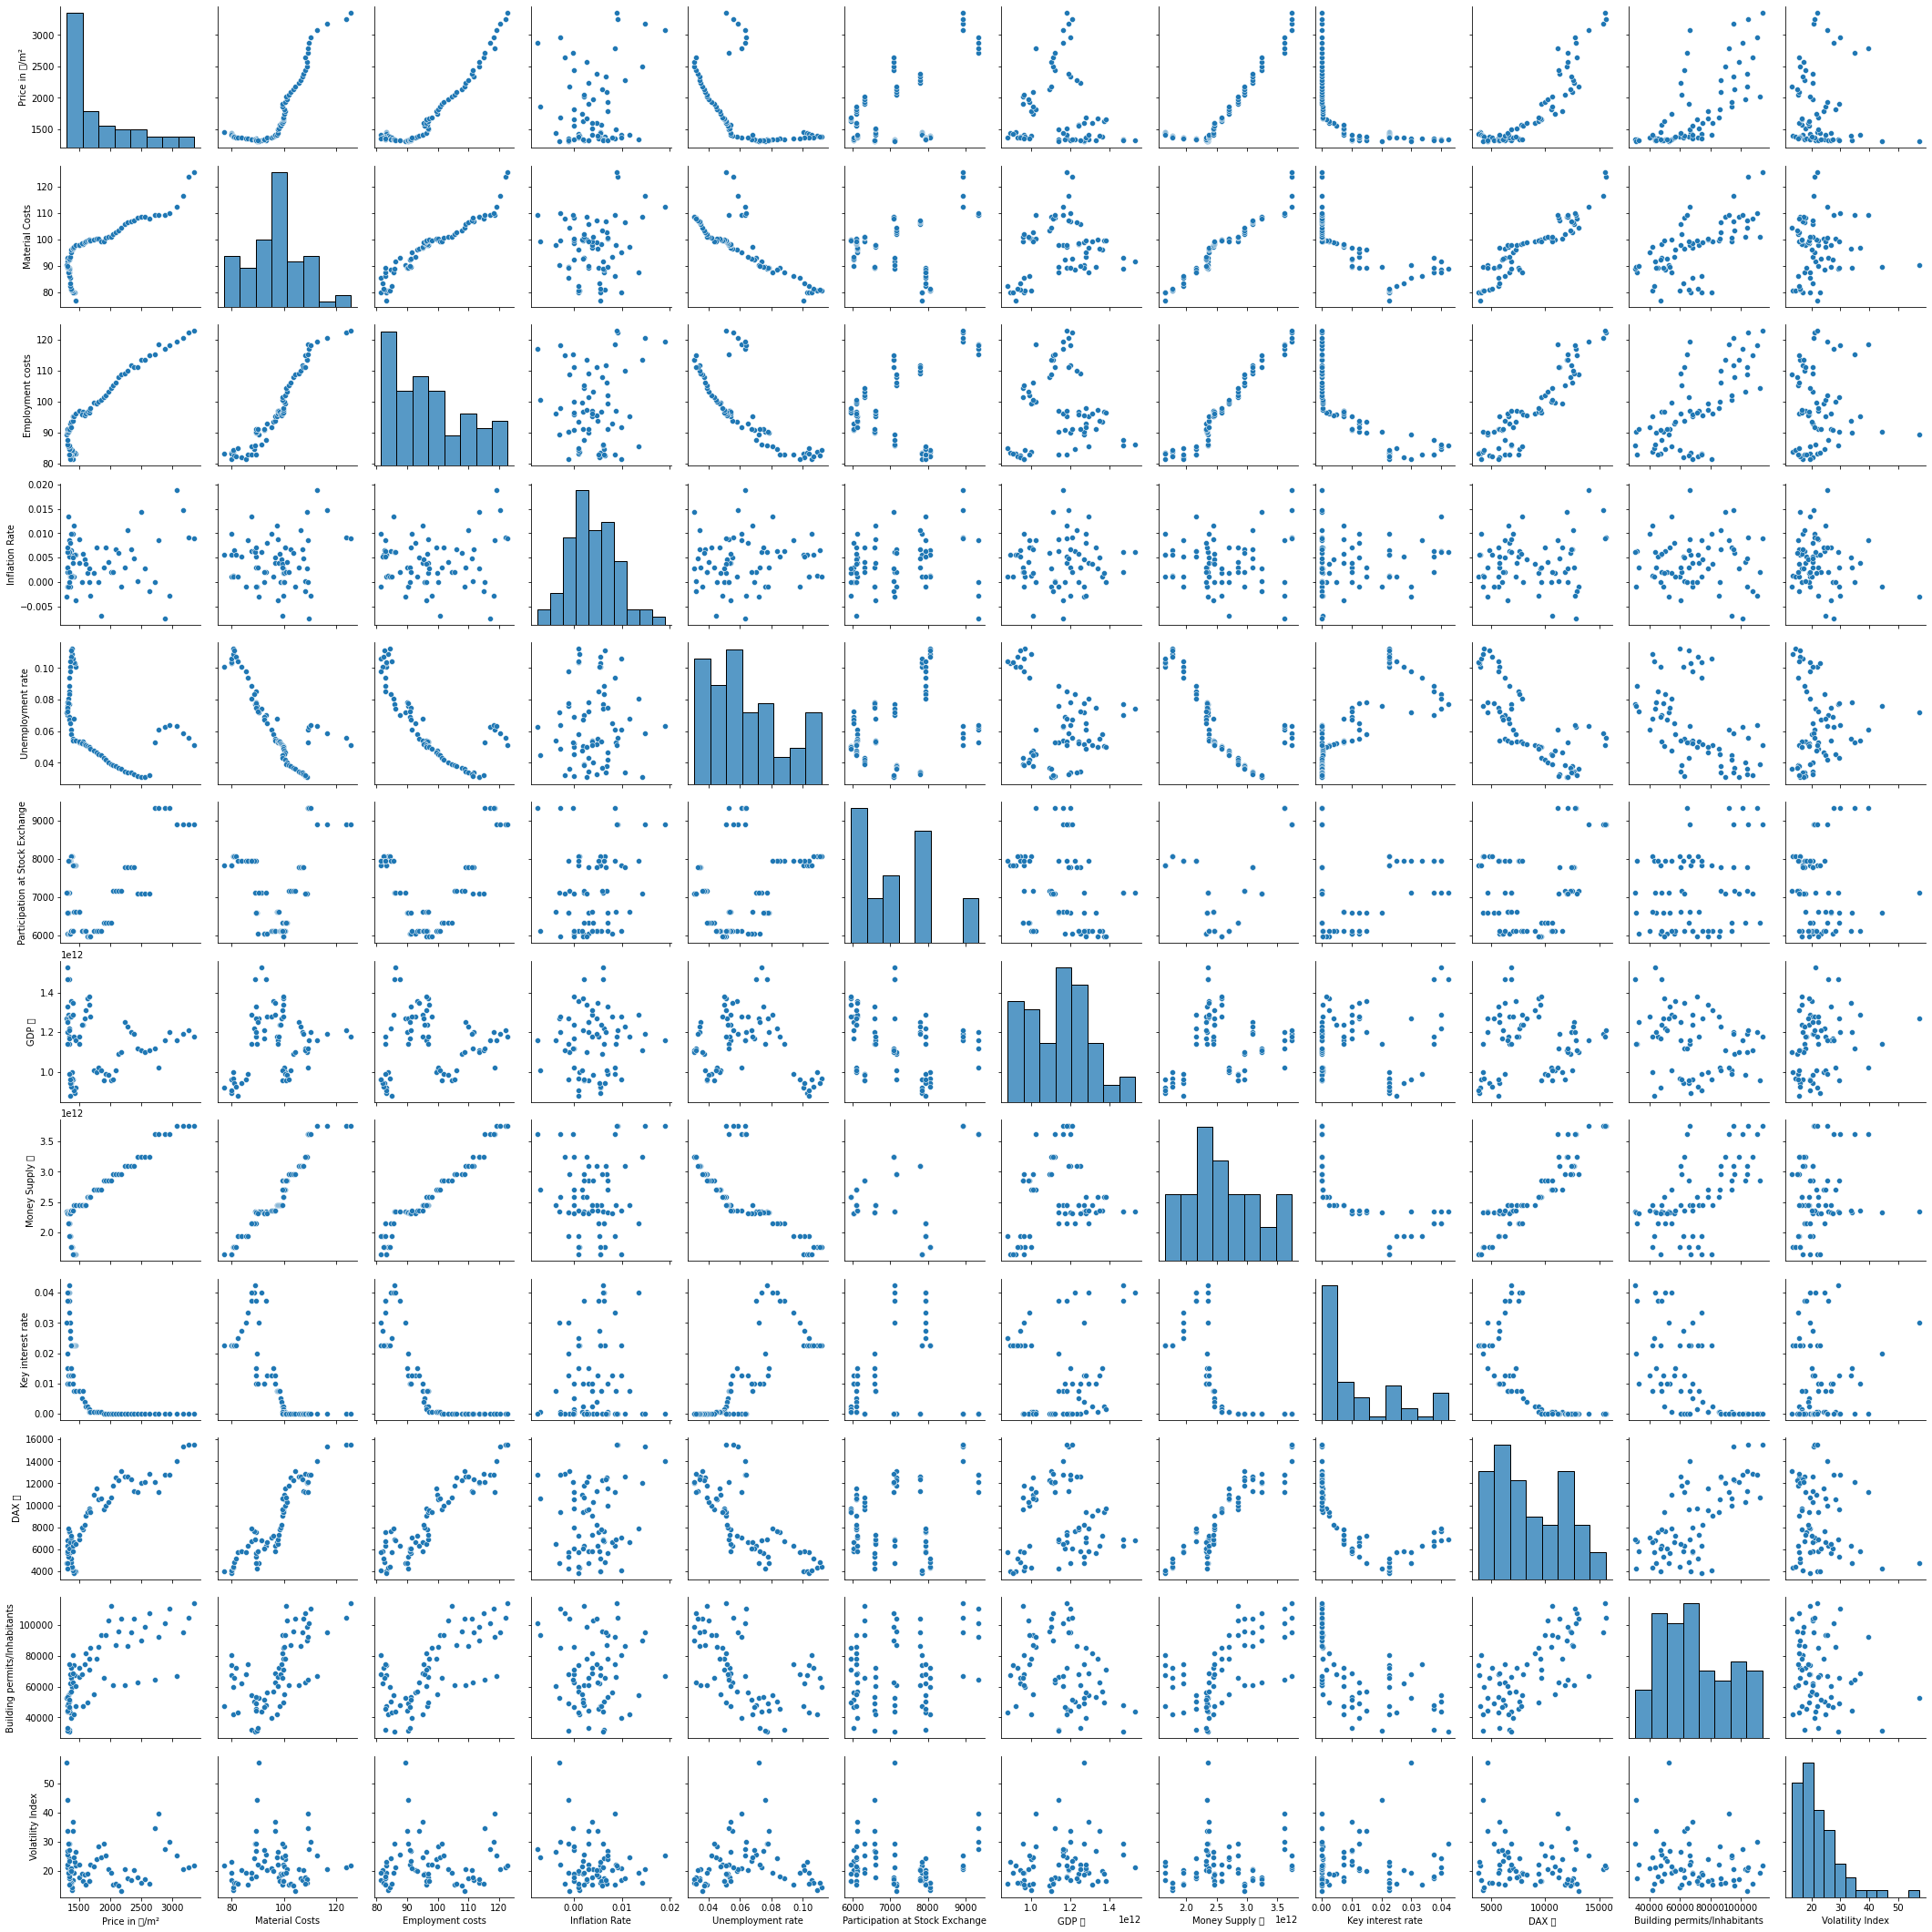

In [91]:
pp=sns.pairplot(customers)   #pairplot of all variables

In [92]:
customers.head(3)   #rechecking the variables

,Price in /m²,Material Costs,Employment costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Money Supply ,Key interest rate,DAX ,Building permits/Inhabitants,Volatility Index
0,1448,76.9,83.2,0.0055,0.10050,7843,9.180000e+11,1.640000e+12,0.0225,4018.51,47075,22.06
1,1433,79.9,83.3,0.0055,0.10300,7843,8.940000e+11,1.640000e+12,0.0225,3950.01,67250,23.07
2,1422,79.9,83.2,0.0011,0.10375,7843,9.050000e+11,1.640000e+12,0.0225,3858.88,73975,19.55


# Linear regression, Fitting and training the model

In [93]:
y = customers['Price in /m²']  #y variable assigned

In [94]:
X = customers[['Material Costs', 'Employment costs','Inflation Rate','Unemployment rate','Participation at Stock Exchange','GDP ','Money Supply ','Key interest rate','DAX ','Building permits/Inhabitants','Volatility Index']]     #x variables assigned        

In [95]:
from sklearn.model_selection import train_test_split  #importing scikit (python library) learn for machine learning

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)  #splitting train and test data

In [97]:
from sklearn.linear_model import LinearRegression #importing linear algorithm

In [98]:
lm = LinearRegression()

In [99]:
lm.fit(X_train,y_train) #fitting the model

LinearRegression()

In [100]:
print('Coefficients: \n', lm.coef_)  

Coefficients: 
 [ 2.91696335e+00  4.42243760e+01 -1.51223625e+03  7.62923943e+03
  1.82433789e-02 -2.03983733e-10  1.31724710e-10  4.17969015e+03
  2.51873600e-02  7.67415354e-04 -3.56882900e+00]


In [101]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df    #coefficients printed

,Coefficient
Material Costs,2.916963e+00
Employment costs,4.422438e+01
Inflation Rate,-1.512236e+03
Unemployment rate,7.629239e+03
Participation at Stock Exchange,1.824338e-02
GDP ,-2.039837e-10
Money Supply ,1.317247e-10
Key interest rate,4.179690e+03
DAX ,2.518736e-02
Building permits/Inhabitants,7.674154e-04


In [102]:
print(lm.intercept_)    #the intercept

-3753.468719818219


In [103]:
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0     -3753.4687          444.336    -8.447          0.000
1         2.9170            4.887     0.597          0.553
2        44.2244            7.777     5.687          0.000
3     -1512.2362         2160.013    -0.700          0.487
4      7629.2394         1446.845     5.273          0.000
5         0.0182            0.030     0.606          0.547
6        -0.0000            0.000    -2.119          0.038
7         0.0000            0.000     0.946          0.348
8      4179.6902         2405.653     1.737          0.087
9         0.0252            0.014     1.857          0.068
10        0.0008            0.001     1.002          0.320
11       -3.5688            1.965    -1.816          0.074


In [104]:
print(params)

[-3.7534687e+03  2.9170000e+00  4.4224400e+01 -1.5122362e+03
  7.6292394e+03  1.8200000e-02 -0.0000000e+00  0.0000000e+00
  4.1796902e+03  2.5200000e-02  8.0000000e-04 -3.5688000e+00]


In [105]:
import statsmodels.api as sm
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Material Costs                     1.457469e-01
Employment costs                   4.497612e-01
Inflation Rate                     1.640084e-01
Unemployment rate                  4.315101e-01
Participation at Stock Exchange    1.506612e-03
GDP                               1.295116e-01
Money Supply                      4.795784e-08
Key interest rate                  1.106096e-02
DAX                               3.596106e-01
Building permits/Inhabitants       1.394880e-03
Volatility Index                   9.521411e-02
Name: P>|t|, dtype: float64


In [106]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

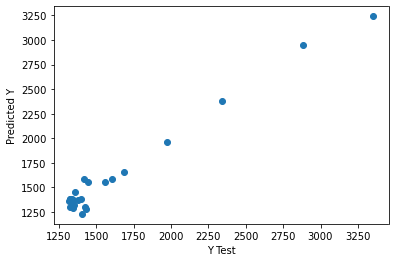

In [107]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')  #graph of predictions vs actual values

In [108]:
from sklearn import metrics       #printing the errors to measure model accuracy

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 61.365828261347964
MSE: 6339.131633776514
RMSE: 79.6186638532481


In [109]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')   #printing r squared value

97.60326427929331 %


# Checking for highly correlated variables

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


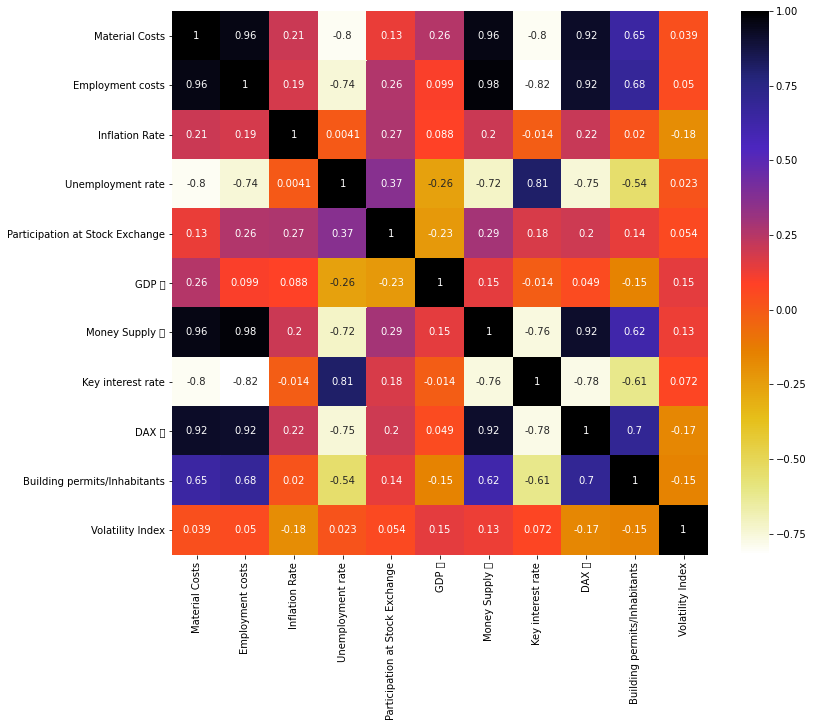

In [110]:
plt.figure(figsize=(12,10)) #we check for correlated variables through a heatmap
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [111]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

#we use this bit of code to identify variables with a certain level of correlation with each other

In [117]:
corr_features = correlation(X_train,0.90) #the threshold is set to 90 percent
len(set(corr_features))

3

In [118]:
corr_features #name of the highly correlated variables

{'DAX \x80', 'Employment costs', 'Money Supply \x80'}

In [119]:
X_train=X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)  #we remove the variables now

In [121]:
print(X)

    Material Costs  Inflation Rate  Unemployment rate  \
0             76.9          0.0055            0.10050   
1             79.9          0.0055            0.10300   
2             79.9          0.0011            0.10375   
3             79.9          0.0099            0.10600   
4             80.5          0.0012            0.10900   
..             ...             ...                ...   
67           110.0         -0.0028            0.06375   
68           112.5          0.0189            0.06325   
69           116.6          0.0148            0.05875   
70           123.9          0.0092            0.05575   
71           125.6          0.0090            0.05125   

    Participation at Stock Exchange         GDP   Key interest rate  \
0                              7843  9.180000e+11             0.0225   
1                              7843  8.940000e+11             0.0225   
2                              7843  9.050000e+11             0.0225   
3                          

In [129]:
X_train.head(5)

,Material Costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Key interest rate,Building permits/Inhabitants,Volatility Index
41,99.6,0.0000,0.05000,5967,1.380000e+12,0.0015,71250,16.57
48,99.4,0.0030,0.04325,6332,9.590000e+11,0.0000,65625,29.42
15,87.6,0.0135,0.08075,7947,1.290000e+12,0.0400,54600,19.40
38,98.9,0.0047,0.05175,6110,1.270000e+12,0.0040,74800,18.78
54,103.4,0.0059,0.03700,7168,1.090000e+12,0.0000,95700,15.11


In [130]:
X_test.head(5)

,Material Costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Key interest rate,Building permits/Inhabitants,Volatility Index
6,80.9,0.0065,0.11100,8066,9.450000e+11,0.0225,66000,16.13
50,101.0,0.0040,0.04025,6332,9.840000e+11,0.0000,103125,20.56
39,99.3,0.0038,0.05100,6110,1.310000e+12,0.0025,81600,15.53
32,97.3,0.0116,0.06800,6620,1.180000e+12,0.0075,42175,24.71
58,107.0,0.0067,0.03400,7785,1.200000e+12,0.0000,95425,16.79


In [131]:
lm2 = LinearRegression() #we fit the model again, train and test the data to get coefficients, intercepts and errors


In [132]:
lm2.fit(X_train,y_train)

LinearRegression()

In [133]:
print('Coefficients: \n', lm2.coef_)

Coefficients: 
 [ 3.95788345e+01 -8.85310045e+02  9.82830711e+02  2.23961290e-01
 -3.75679233e-10 -8.66343405e+03  1.22863098e-03 -1.34058953e+00]


In [134]:
print(lm2.intercept_)

-3230.349897351998


In [135]:
params = np.append(lm2.intercept_,lm2.coef_)
predictions = lm2.predict(X)
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)


   Coefficients  Standard Errors  t values  Probabilities
0    -3230.3499          353.155    -9.147          0.000
1       39.5788            4.644     8.522          0.000
2     -885.3100         3219.504    -0.275          0.784
3      982.8307         1695.401     0.580          0.564
4        0.2240            0.028     8.126          0.000
5       -0.0000            0.000    -2.710          0.009
6    -8663.4340         2354.394    -3.680          0.000
7        0.0012            0.001     1.202          0.234
8       -1.3406            2.041    -0.657          0.514


In [136]:

import statsmodels.api as sm
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Material Costs                     3.611732e-01
Inflation Rate                     1.603944e-01
Unemployment rate                  3.542067e-10
Participation at Stock Exchange    1.190280e-14
GDP                               1.678843e-01
Key interest rate                  9.299902e-05
Building permits/Inhabitants       3.886374e-01
Volatility Index                   9.368664e-01
Name: P>|t|, dtype: float64


In [137]:
predictions = lm2.predict( X_test) #graph of test vs actual values

Text(0, 0.5, 'Predicted Y')

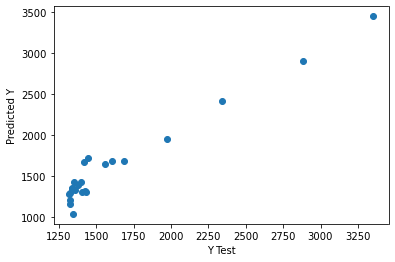

In [138]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [139]:
from sklearn import metrics #error calculation

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 86.18598063753973
MSE: 14517.234599106612
RMSE: 120.48748731344102


In [140]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')  #R squared value

94.5112395924756 %


# Mutual information selection feature setting

In [141]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info     #we sort variables on the basis of their mutual information values

array([1.51147862, 0.13481459, 1.38814036, 1.01906488, 0.50318815,
       0.82250861, 0.36761166, 0.11320441])

In [142]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False) # sorting values

Material Costs                     1.511479
Unemployment rate                  1.388140
Participation at Stock Exchange    1.019065
Key interest rate                  0.822509
GDP                               0.503188
Building permits/Inhabitants       0.367612
Inflation Rate                     0.134815
Volatility Index                   0.113204
dtype: float64

<AxesSubplot:>

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


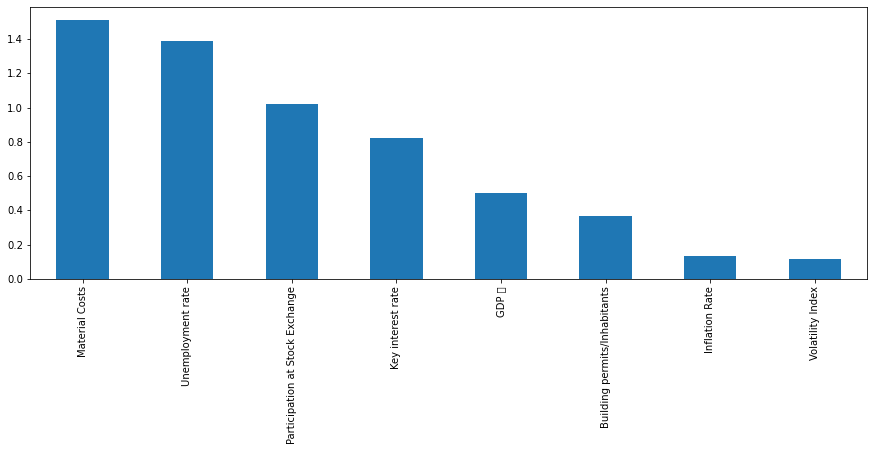

In [143]:
 mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))  #visualizing values

In [144]:
from sklearn.feature_selection import SelectPercentile  #selecting the top 80 percent of the features

In [145]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=80)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=80,
                 score_func=<function mutual_info_regression at 0x00000131572EED30>)

In [146]:
selected_top_columns.get_support()

array([ True, False,  True,  True,  True,  True,  True, False])

In [147]:
X_train.columns[selected_top_columns.get_support()]

Index(['Material Costs', 'Unemployment rate',
       'Participation at Stock Exchange', 'GDP ', 'Key interest rate',
       'Building permits/Inhabitants'],
      dtype='object')

In [148]:
X_train.head()

,Material Costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Key interest rate,Building permits/Inhabitants,Volatility Index
41,99.6,0.0000,0.05000,5967,1.380000e+12,0.0015,71250,16.57
48,99.4,0.0030,0.04325,6332,9.590000e+11,0.0000,65625,29.42
15,87.6,0.0135,0.08075,7947,1.290000e+12,0.0400,54600,19.40
38,98.9,0.0047,0.05175,6110,1.270000e+12,0.0040,74800,18.78
54,103.4,0.0059,0.03700,7168,1.090000e+12,0.0000,95700,15.11


In [48]:
#we remove volatility index and inflation rate 

In [149]:
X_train=X_train.drop('Volatility Index',axis=1)
X_train=X_train.drop('Inflation Rate',axis=1)

In [163]:
X=X.drop('Volatility Index',axis=1)
X=X.drop('Inflation Rate',axis=1)

In [151]:
X_test.head(2)

,Material Costs,Unemployment rate,Participation at Stock Exchange,GDP ,Key interest rate,Building permits/Inhabitants
6,80.9,0.11100,8066,9.450000e+11,0.0225,66000
50,101.0,0.04025,6332,9.840000e+11,0.0000,103125


In [152]:
from sklearn.linear_model import LinearRegression  #do the regression again to get results

In [154]:
lm3 = LinearRegression()

In [155]:
lm3.fit(X_train,y_train)

LinearRegression()

In [156]:
print('Coefficients: \n', lm3.coef_)

Coefficients: 
 [ 3.88956313e+01  9.15489020e+02  2.23570868e-01 -3.78236740e-10
 -8.88544994e+03  1.38851264e-03]


In [157]:
print(lm3.intercept_)

-3196.320205965543


In [158]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')  #R squared value

94.58984338507526 %


In [159]:
predictions = lm3.predict( X_test)

Text(0, 0.5, 'Predicted Y')

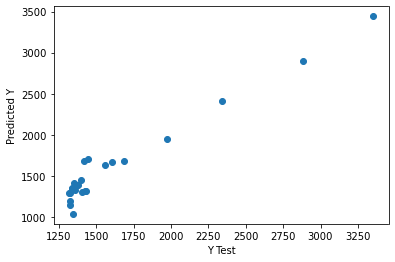

In [160]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [161]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 83.77473786130845
MSE: 14309.335253384701
RMSE: 119.62163371808923


In [164]:
params = np.append(lm3.intercept_,lm3.coef_)
predictions = lm3.predict(X)
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0    -3196.3202          339.350    -9.419          0.000
1       38.8956            4.411     8.818          0.000
2      915.4890         1658.000     0.552          0.583
3        0.2236            0.027     8.238          0.000
4       -0.0000            0.000    -2.783          0.007
5    -8885.4499         2287.317    -3.885          0.000
6        0.0014            0.001     1.428          0.158


In [165]:
import statsmodels.api as sm
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Material Costs                     2.807030e-01
Unemployment rate                  1.243093e-10
Participation at Stock Exchange    3.566697e-15
GDP                               1.279571e-01
Key interest rate                  1.417778e-04
Building permits/Inhabitants       4.876978e-01
Name: P>|t|, dtype: float64


# Pairplots

In [12]:
customers2 = pd.read_csv("C:/Users/Jarvis/Desktop/mt_data22.csv",encoding= 'unicode_escape')  # importing file

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


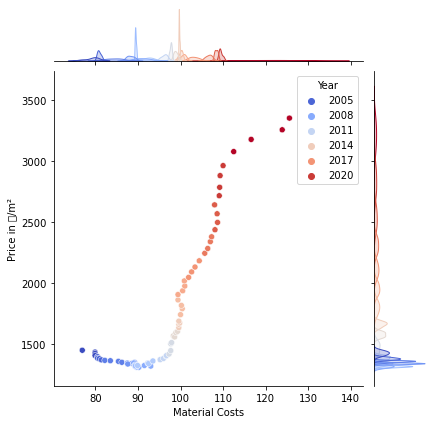

In [16]:
sns.jointplot(y='Price in /m²',x='Material Costs',hue='Year',data=customers2,palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


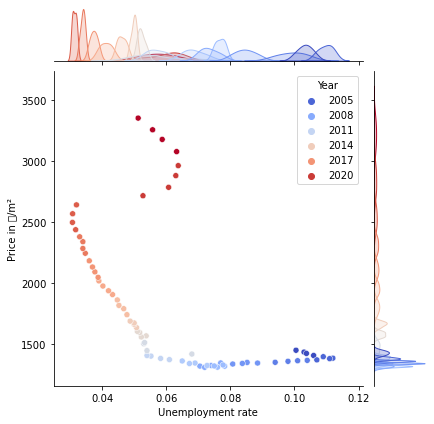

In [17]:
sns.jointplot(y='Price in /m²',x='Unemployment rate',hue='Year',data=customers2,palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


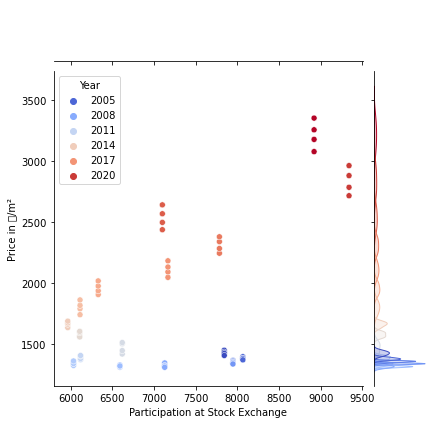

In [18]:
sns.jointplot(y='Price in /m²',x='Participation at Stock Exchange',hue='Year',data=customers2,palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


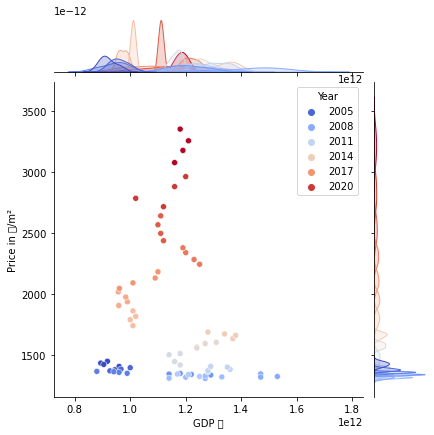

In [19]:
sns.jointplot(y='Price in /m²',x='GDP ',hue='Year',data=customers2,palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


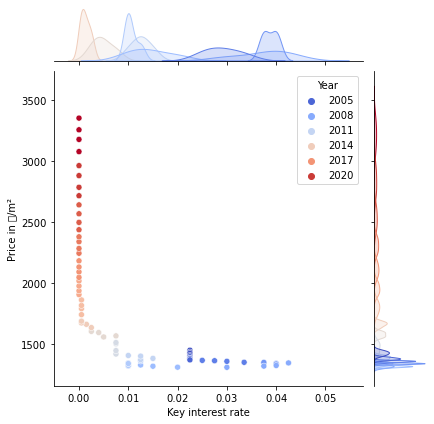

In [20]:
sns.jointplot(y='Price in /m²',x='Key interest rate',hue='Year',data=customers2,palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


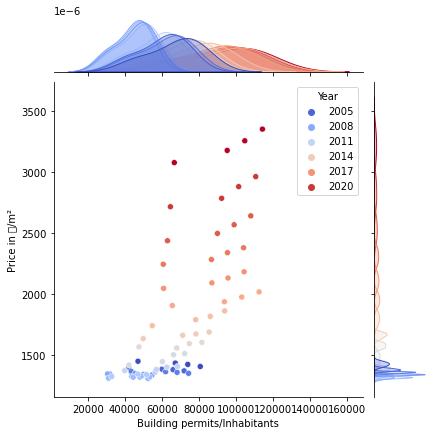

In [21]:
sns.jointplot(y='Price in /m²',x='Building permits/Inhabitants',hue='Year',data=customers2,palette='coolwarm')

# END here

In [90]:
customers2 = pd.read_csv("C:/Users/Jarvis/Desktop/mt_data22.csv",encoding= 'unicode_escape')

In [91]:
customers2.head(5)

,Quartal,Year,Price in /m²,Material Costs,Employment costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Money Supply ,Key interest rate,DAX ,Building permits/Inhabitants,Volatility Index
0,1,2004,1448,76.9,83.2,0.0055,0.10050,7843,9.180000e+11,1.640000e+12,0.0225,4018.51,47075,22.06
1,2,2004,1433,79.9,83.3,0.0055,0.10300,7843,8.940000e+11,1.640000e+12,0.0225,3950.01,67250,23.07
2,3,2004,1422,79.9,83.2,0.0011,0.10375,7843,9.050000e+11,1.640000e+12,0.0225,3858.88,73975,19.55
3,4,2004,1405,79.9,81.3,0.0099,0.10600,7843,9.600000e+11,1.640000e+12,0.0225,4079.26,80700,16.97
4,1,2005,1395,80.5,83.6,0.0012,0.10900,8066,1.000000e+12,1.770000e+12,0.0225,4309.37,42000,13.50


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


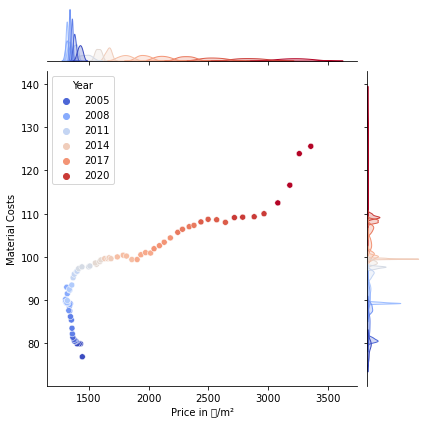

In [103]:
sns.jointplot(x='Price in /m²',y='Material Costs',data=customers2,hue='Year',palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


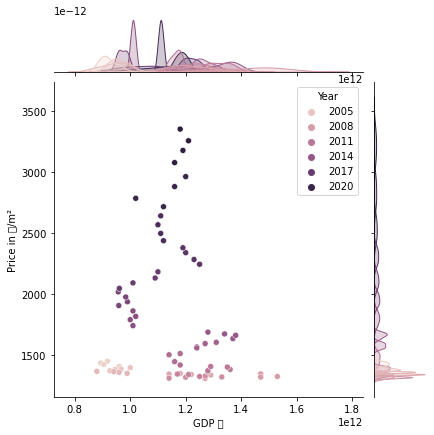

In [100]:
sns.jointplot(x='GDP ',y='Price in /m²',data=customers2,hue='Year')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


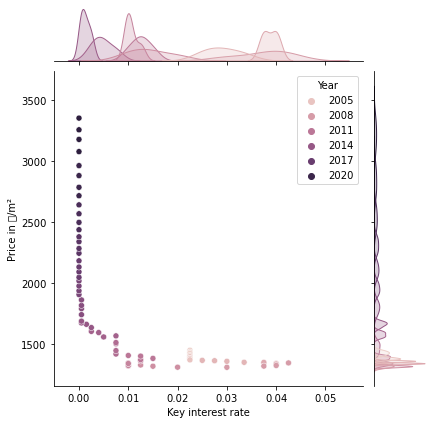

In [96]:
sns.jointplot(x='Key interest rate',y='Price in /m²',data=customers2,hue='Year')

In [322]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

In [93]:
lm.fit(X_train,y_train)

LinearRegression()

In [94]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 3.76664307e+01  7.63653798e+02  2.38351313e-01 -2.46543322e-10
 -8.10022576e+03  1.68366335e-03]


In [95]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

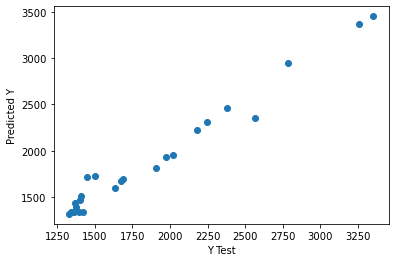

In [96]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [97]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81.58223648191874
MSE: 11521.31886260398
RMSE: 107.33740663256206


In [98]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

96.79319975885458 %


C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price in \x80/m²', ylabel='Density'>

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


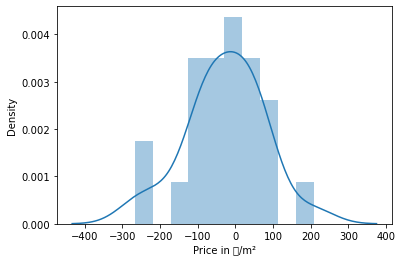

In [335]:
sns.distplot((y_test-predictions),bins=10)

# ending here

Feature 0: 11.062683
Feature 1: 3.658726
Feature 2: 6.056499
Feature 3: 0.438893
Feature 4: 17.281429
Feature 5: 4.056207
Feature 6: 2.848413
Feature 7: 0.678655
Feature 8: 4.639745
Feature 9: 11.178183
Feature 10: 14.594848


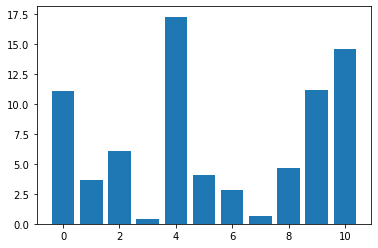

In [ ]:
X = customers[['Material Costs', 'Employment costs', 'Unemployment rate in %','Participation at Stock Exchange','GDP in Billion Dollar','Money Supply M1, M2 & M3','Key interest rate in %','DAX in ','Anzahl von Baugenehmigungen pro Einwohner in 1000 als proxy','Volatilitätsindex']]

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lm = LinearRegression()

In [117]:
lm.fit(X_train,y_train)

LinearRegression()

In [118]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 42.69712913 -32.29251094   0.21971605   3.11419682  -2.87208296]


In [119]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

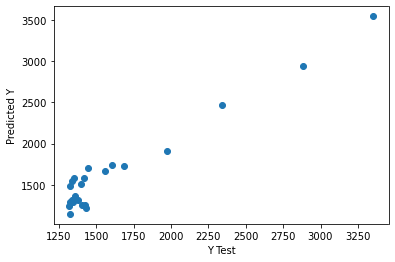

In [121]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [122]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 117.9667907362242
MSE: 19183.85425308439
RMSE: 138.50579140629605


In [123]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Material Costs,42.697129
Inflation in %,-32.292511
Participation at Stock Exchange,0.219716
Anzahl von Baugenehmigungen pro Einwohner in 1000 als proxy,3.114197
Volatilitätsindex,-2.872083


In [50]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 

 


In [61]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [105]:
# load the dataset
X, y = make_regression(n_samples=72, n_features=11, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)



MAE: 0.097


In [106]:
predictions = lm.predict( X_test_fs)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 11)

ValueError: x and y must be the same size

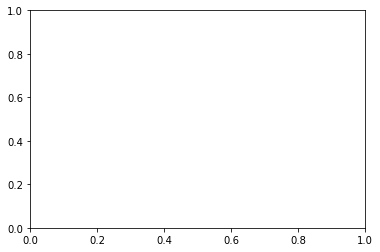

In [100]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [89]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 22017628.174990494
